In [1]:
!pip install mne --upgrade

In [3]:
# https://mne.tools/stable/auto_examples/io/read_noise_covariance_matrix.html
from os import path as op
import mne
from mne.datasets import sample

data_path = sample.data_path()
fname_cov = op.join(data_path, 'MEG', 'sample', 'sample_audvis-cov.fif')
fname_evo = op.join(data_path, 'MEG', 'sample', 'sample_audvis-ave.fif')

cov = mne.read_cov(fname_cov)
print(cov)
ev_info = mne.io.read_info(fname_evo)

    366 x 366 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
<Covariance | size : 366 x 366, n_samples : 15972, data : [[ 2.27235589e-23  4.79818505e-24  7.12852747e-25 ...  4.85348042e-18
   2.02846360e-18  8.26727393e-18]
 [ 4.79818505e-24  5.33468523e-24  1.80261790e-25 ...  2.33583009e-19
  -6.93161055e-19  2.35199238e-18]
 [ 7.12852747e-25  1.80261790e-25  5.79073915e-26 ...  1.09498615e-19
   6.16924072e-21  2.93873875e-19]
 ...
 [ 4.85348042e-18  2.33583009e-19  1.09498615e-19 ...  1.40677185e-11
   1.27444183e-11  1.08634620e-11]
 [ 2.02846360e-18 -6.93161055e-19  6.16924072e-21 ...  1.27444183e-11
   1.59818134e-11  8.51070563e-12]
 [ 8.26727393e-18  2.35199238e-18  2.93873875e-19 ...  1.08634620e-11
   8.51070563e-12  1.53708918e-11]]>
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
   

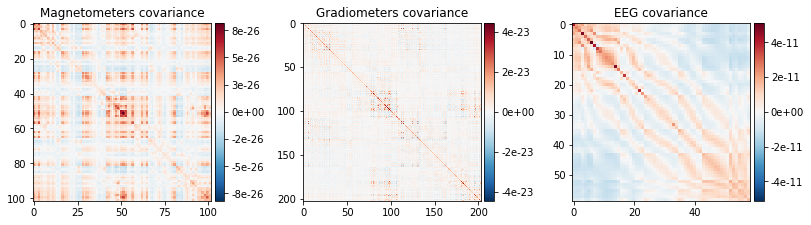

(<Figure size 820.8x266.4 with 6 Axes>, None)

In [5]:
cov.plot(ev_info, exclude='bads', show_svd=False)

In [6]:
# Power Spectral Density of inverse solution from single epochs
import matplotlib.pyplot as plt
from mne.minimum_norm import read_inverse_operator, compute_source_psd_epochs

print(__doc__)

data_path = sample.data_path()
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
fname_raw = data_path + '/MEG/sample/sample_audvis_raw.fif'
fname_event = data_path + '/MEG/sample/sample_audvis_raw-eve.fif'
label_name = 'Aud-lh'
fname_label = data_path + '/MEG/sample/labels/%s.label' % label_name
subjects_dir = data_path + '/subjects'

event_id, tmin, tmax = 1, -0.2, 0.5
snr = 1.0  # use smaller SNR for raw data
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)

# Load data
inverse_operator = read_inverse_operator(fname_inv)
label = mne.read_label(fname_label)
raw = mne.io.read_raw_fif(fname_raw)
events = mne.read_events(fname_event)

# Set up pick list
include = []
raw.info['bads'] += ['EEG 053']  # bads + 1 more

# pick MEG channels
picks = mne.pick_types(raw.info, meg=True, eeg=False, stim=False, eog=True,
                       include=include, exclude='bads')
# Read epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=dict(mag=4e-12, grad=4000e-13,
                                                    eog=150e-6))

# define frequencies of interest
fmin, fmax = 0., 70.
bandwidth = 4.  # bandwidth of the windows in Hz

Automatically created module for IPython interactive environment
Reading inverse operator decomposition from C:\Users\German\mne_data\MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance informatio

In [7]:
# source space PSD in label

n_epochs_use = 10
stcs = compute_source_psd_epochs(epochs[:n_epochs_use], inverse_operator,
                                 lambda2=lambda2,
                                 method=method, fmin=fmin, fmax=fmax,
                                 bandwidth=bandwidth, label=label,
                                 return_generator=True, verbose=True)

# compute average PSD over the first 10 epochs
psd_avg = 0.
for i, stc in enumerate(stcs):
    psd_avg += stc.data
psd_avg /= n_epochs_use
freqs = stc.times  # the frequencies are stored here
stc.data = psd_avg  # overwrite the last epoch's data with the average

Considering frequencies 0 ... 70 Hz
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 305 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Reducing data rank 99 -> 99
Using 2 tapers with bandwidth 4.0 Hz on at most 10 epochs


  0%|          |  : 0/10 [00:00<?,       ?it/s]

C:\Users\German\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Power Spectral Density')

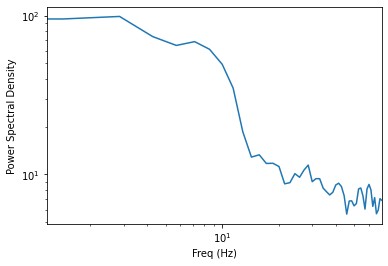

In [12]:
# source space PSD in labelfig, ax = plt.subplots()
ax.loglog(freqs, psd_avg.mean(axis=0))
ax.set_xlabel('Freq (Hz)')
ax.set_xlim(stc.times[[0, -1]])
ax.set_ylabel('Power Spectral Density')